In [ ]:
# This is dataset study and analysis where the housing prices in new city will used to build a regression model ...

In [83]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Housing.csv")

df.head()


df_2_mainroad = np.where(1,df['mainroad'] == 'yes',0)

df_2_guestroom = np.where(1,df['guestroom'] == 'yes',0)


df_2_basement = np.where(1,df['basement'] == 'yes',0)

df_2_hotwaterheating = np.where(1,df['hotwaterheating'] == 'yes',0)


df_2_airconditioning = np.where(1,df['airconditioning'] == 'yes',0)

df_2_preface= np.where(1,df['prefarea'] == 'yes',0)


df_2_furnishing = np.where(1,df['furnishingstatus'] == 'furnished',0)

df_2 = df[['area',"bathrooms",'stories','parking','bedrooms','stories']]

df_2['mainroad'] = df_2_mainroad

df_2['guestrooom'] = df_2_guestroom

df_2['basement'] = df_2_basement

df_2['hotwater'] = df_2_hotwaterheating

df_2['airconditiong'] = df_2_airconditioning

df_2['prefare'] = df_2_preface

df_2['furnishing'] = df_2_furnishing

df_2

/tmp/ipython-input-31333581.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['mainroad'] = df_2_mainroad
/tmp/ipython-input-31333581.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['guestrooom'] = df_2_guestroom
/tmp/ipython-input-31333581.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,area,bathrooms,stories,parking,bedrooms,stories,mainroad,guestrooom,basement,hotwater,airconditiong,prefare,furnishing
0,7420,2,3,2,4,3,1,0,0,0,1,1,1
1,8960,4,4,3,4,4,1,0,0,0,1,0,1
2,9960,2,2,2,3,2,1,0,1,0,0,1,0
3,7500,2,2,3,4,2,1,0,1,0,1,1,1
4,7420,1,2,2,4,2,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,2,1,1,0,1,0,0,0,0
541,2400,1,1,0,3,1,0,0,0,0,0,0,0
542,3620,1,1,0,2,1,1,0,0,0,0,0,0
543,2910,1,1,0,3,1,0,0,0,0,0,0,1


In [6]:
df.describe()

df.shape

(545, 13)

In [30]:
df.isnull().any()
df.isna().any()

df.duplicated().any()


for i in df.columns:
  if df[i].dtype == "object":
    continue

  value = df['price'].corr(df[i])

  print(f"the columns {i} :- {value}")

the columns price :- 1.0
the columns area :- 0.5359973457780796
the columns bedrooms :- 0.3664940257738689
the columns bathrooms :- 0.517545339455011
the columns stories :- 0.4207123661886163
the columns parking :- 0.3843936486357259


<Axes: >

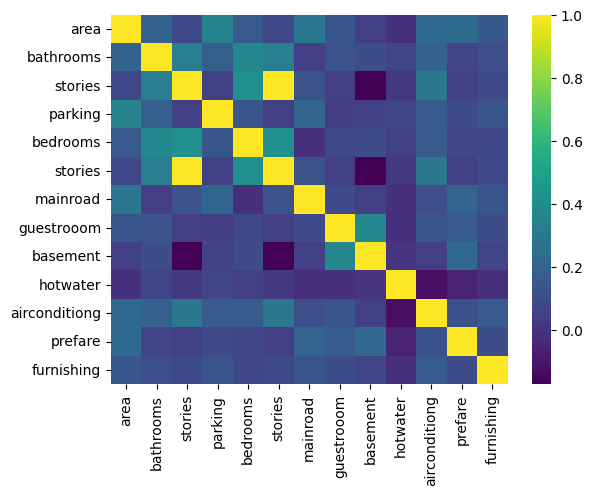

In [84]:
import seaborn as sns

sns.heatmap(df_2.corr(),cmap='viridis')

# 2 . Model Building

2.1. Linear Regression

In [90]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error , r2_score


X = df_2

Y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size= 0.8,random_state=88)


model_1 = LinearRegression()

model_1.fit(X_train,y_train)

prediction_1 = model_1.predict(X_test)


print(f"The mean absolute error of the model is :- { mean_squared_error(y_test,prediction_1)} and r2 score is {r2_score(y_test,prediction_1)}")



The mean absolute error of the model is :- 1364175419100.8818 and r2 score is 0.607883459357121


2.2 Random Forest Model

In [91]:
from sklearn.ensemble import RandomForestRegressor


model_2 = RandomForestRegressor()

model_2.fit(X_train,y_train)

prediction_2 = model_2.predict(X_test)


print(f"The mean absolute error of the model is :- { mean_squared_error(y_test,prediction_2)} and r2 score is {r2_score(y_test,prediction_2)}")



The mean absolute error of the model is :- 1677000469328.4954 and r2 score is 0.5179654951391954
